<center><h1>chen_jacqueline_HW6</h1></center>
<br>
<br>


Name: Jacqueline Chen
<br>
Github Username: jchen741
<br>
USC ID: 7983593463

## 1. Tree-Based Methods

Import packages

In [56]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, KFold, LeaveOneOut
import xgboost
from sklearn.model_selection import cross_val_score
from statistics import mean

### (a) Download the APS Failure data

In [22]:
train = pd.read_csv('../data/aps_failure_training_set.csv',skiprows = 20)
test = pd.read_csv('../data/aps_failure_test_set.csv', skiprows = 20)
df = pd.concat([train,test],ignore_index= True)
df

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
2       neg   41040     na         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874     na        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
75995   neg   81852     na  2130706432    892      0      0      0      0   
75996   neg      18      0          52     46      8     26      0      0   
75997   neg   79636     na        1670   1518      0      0      0      0   
75998   neg     110     na          36     32      0      0      0      0   
75999   neg       8      0           6      4      2      2      0      0   

      ag_002  ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384  721044  469792  339156  157956   73224   
1          0  ...   421400  178064  293306  245416  133654   81140   97576   
2          0  ...   277378  159812  423992  409564  320746  158022   95128   
3          0  ...      240      46      58      44      10       0       0   
4          0  ...   622012  229790  405298  347188  286954  311560  433954   
...      ...  ...      ...     ...     ...     ...     ...     ...     ...   
75995      0  ...   632658  273242  510354  373918  349840  317840  960024   
75996      0  ...      266      44      46      14       2       0       0   
75997      0  ...   806832  449962  778826  581558  375498  222866  358934   
75998      0  ...      588     210     180     544    1004    1338      74   
75999      0  ...       46      10      48      14      42      46       0   

      ee_009 ef_000 eg_000  
0          0      0      0  
1       1500      0      0  
2        514      0      0  
3          0      4     32  
4       1218      0      0  
...      ...    ...    ...  
75995  25566      0      0  
75996      0      0      0  
75997  19548      0      0  
75998      0      0      0  
75999      0      0      0  

[76000 rows x 171 columns]

### (b) Data Preparation

#### (i) Research what types of techniques are usually used

Imputation techniques, like simple imputation with mean/median/mode imputation can be used. There is regression imputation where we would use a regression model to predict missing values based on other variables. Also, K-Nearest Neighbors (KNN) Imputation where we can use values of the k-nearest neighbors to estimate missing values.

In [23]:
def replace_nans(x):
    if x == 'na':
        return np.nan
    else :
        return x
for col in df.columns:
    df[col]=df[col].apply(lambda x:replace_nans(x))
knn_df = df
mean_df = df

In [24]:
# X=knn_df.iloc[:,1:]
# imp_knn = KNNImputer(n_neighbors = 2)
# knn_df.iloc[:,1:]= imp_knn.fit_transform(X)

In [25]:
X = mean_df.iloc[:,1:]
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
mean_df.iloc[:,1:]= imp_mean.fit_transform(X)

/var/folders/c_/75z03kpj69bd8p6rwkb71sg40000gn/T/ipykernel_32234/229195052.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  mean_df.iloc[:,1:]= imp_mean.fit_transform(X)


#### (ii) Calculate the coefficient of variation

In [26]:
# cv_knn=knn_df.iloc[:,1:].apply(lambda x: np.std(x, ddof = 1)/np.mean(x)*100)
cv_mean=mean_df.iloc[:,1:].apply(lambda x: np.std(x, ddof = 1)/np.mean(x)*100)


In [27]:
# for col in cv_knn.index:
#     print(col,'=',cv_knn[col])

In [28]:
for col in cv_mean.index:
    print(col,'=',cv_mean[col])

aa_000 = 432.8607835435785
ab_000 = 217.8272593946501
ac_000 = 216.76533085378318
ad_000 = 20672.149958173035
ae_000 = 2229.3670429504105
af_000 = 1820.9015502892044
ag_000 = 9146.065359583532
ag_001 = 4208.434252957034
ag_002 = 1762.5908567425327
ag_003 = 875.3299520356636
ag_004 = 547.5116255435009
ag_005 = 296.42299310403735
ag_006 = 235.25878821684154
ag_007 = 281.249797515666
ag_008 = 627.4980079892669
ag_009 = 3216.705734053613
ah_000 = 231.55400947418997
ai_000 = 1850.630812878214
aj_000 = 4314.447956358602
ak_000 = 7862.2987735910965
al_000 = 911.1991221645787
am_0 = 906.719545392947
an_000 = 225.42266522583648
ao_000 = 227.61144767667582
ap_000 = 308.58848873966116
aq_000 = 285.3471317417563
ar_000 = 1056.9202321812563
as_000 = 11388.275538316746
at_000 = 2318.7059928238405
au_000 = 8608.563751143762
av_000 = 573.0485357529095
ax_000 = 385.90349934226913
ay_000 = 4090.2518755773413
ay_001 = 4924.86345852647
ay_002 = 3834.231917467674
ay_003 = 2833.0035620783533
ay_004 = 3304.0

#### (iii) Plot a correlation matrix

In [29]:
# corr=knn_df.corr()
# corr.style.background_gradient(cmap='coolwarm')

In [30]:
corr=mean_df.corr()
corr.style.background_gradient(cmap='coolwarm')

/var/folders/c_/75z03kpj69bd8p6rwkb71sg40000gn/T/ipykernel_32234/1695644465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=mean_df.corr()
/Users/jacy/anaconda3/lib/python3.11/site-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/jacy/anaconda3/lib/python3.11/site-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


#### (iv) Make scatter plots and box plots

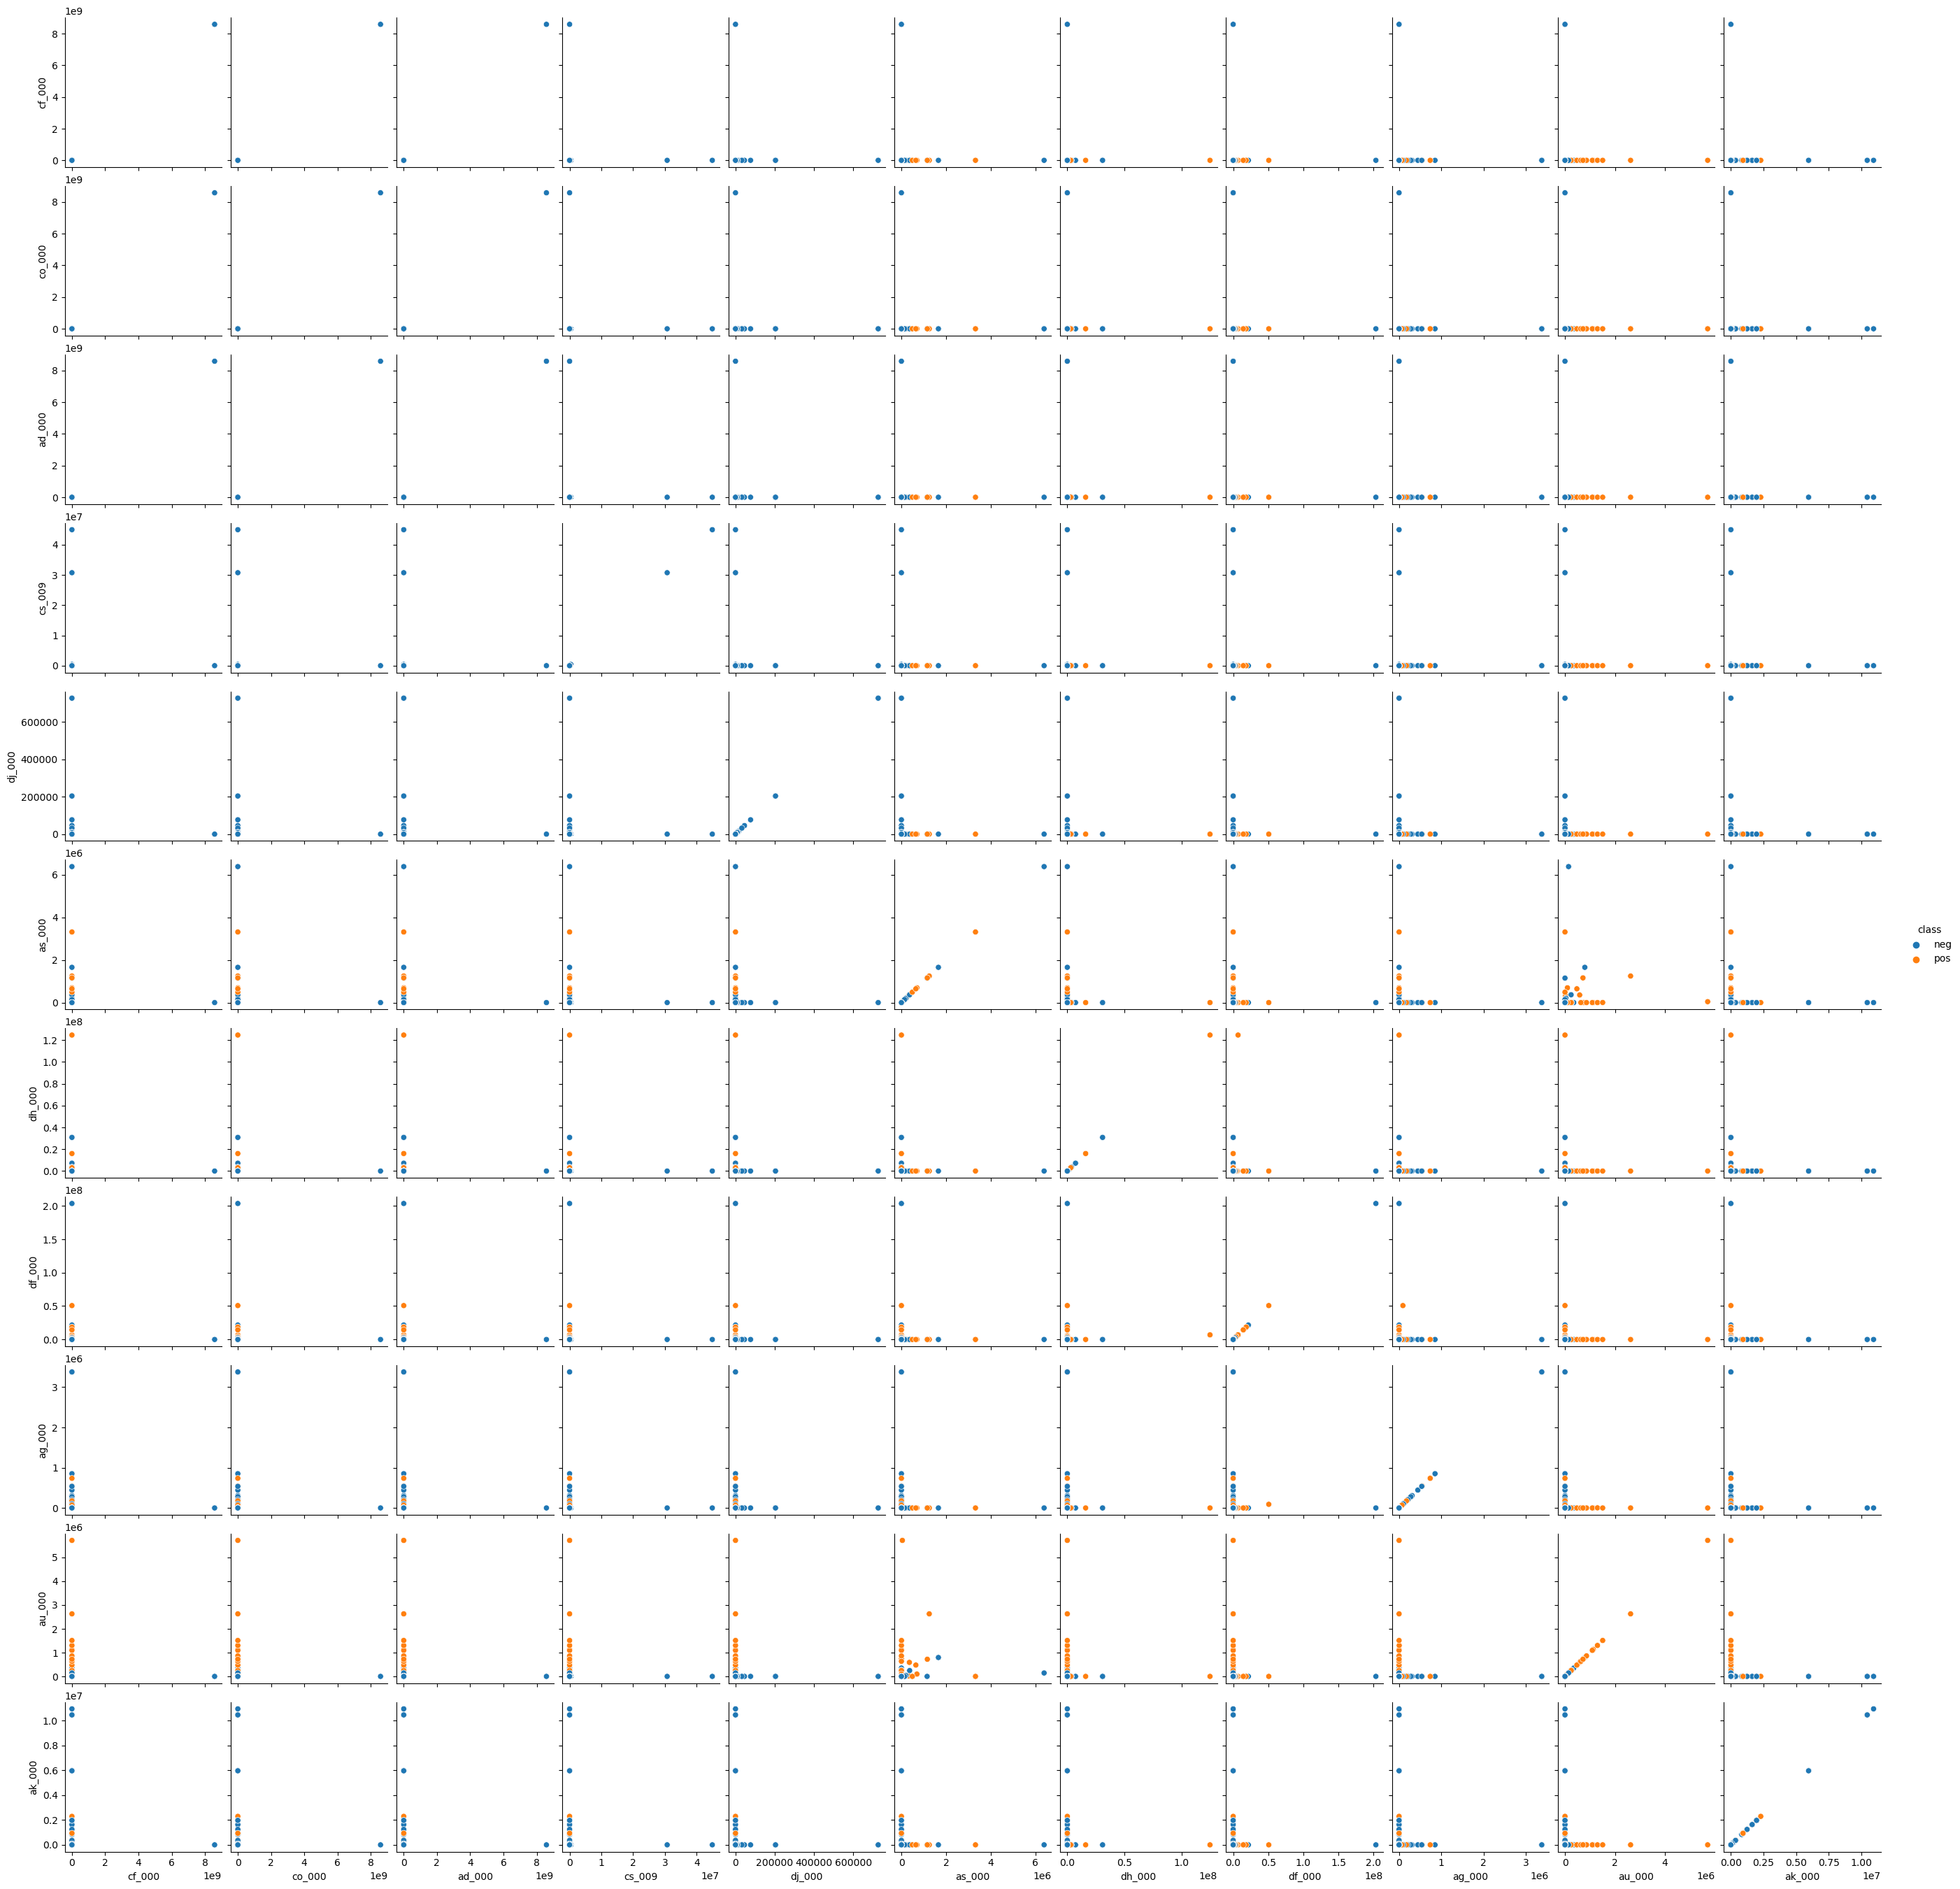

In [31]:
# just going to use data from simple imputing method
sorted_cv=cv_mean.sort_values(ascending=False)
# pick sqr(128) of the features with highest cv
top = int(math.sqrt(128))
top_features=sorted_cv.index[0:top]
top_features=top_features.to_list()+['class']
sns.pairplot(mean_df[top_features],diag_kind=None,hue='class')

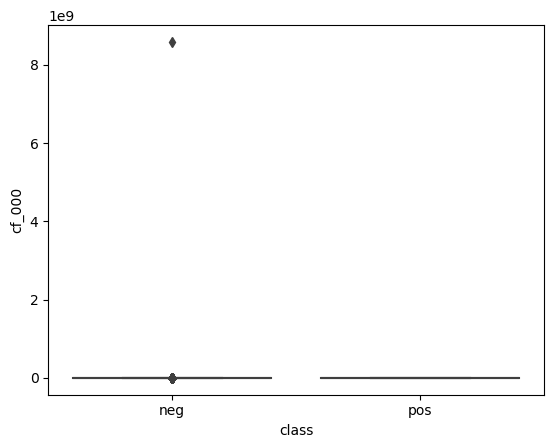

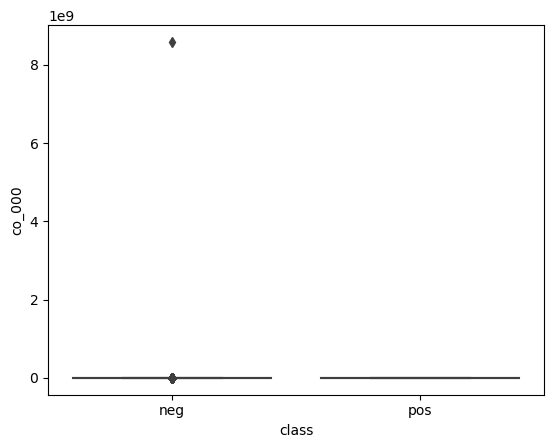

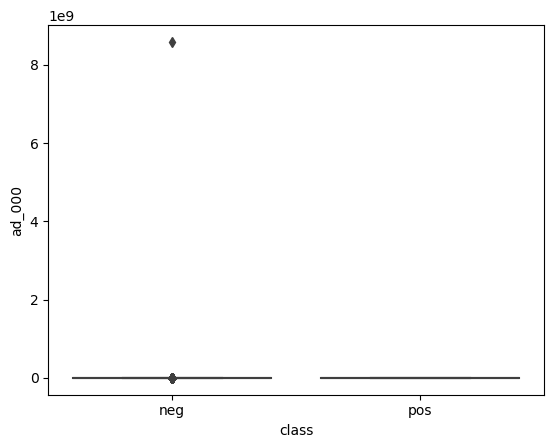

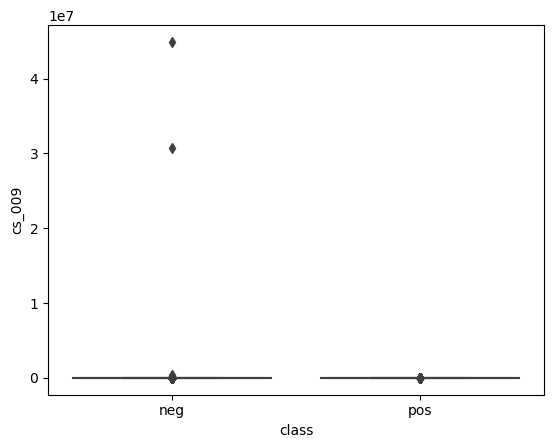

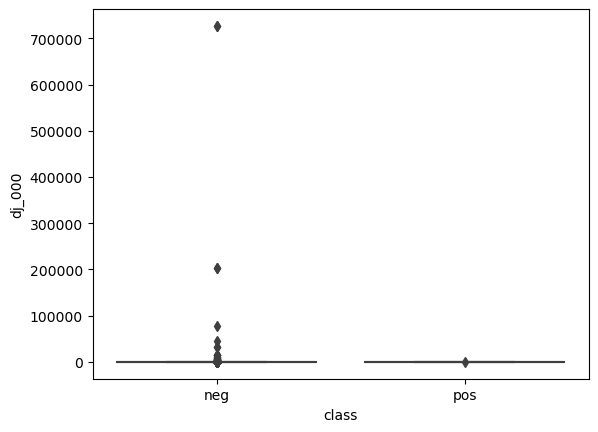

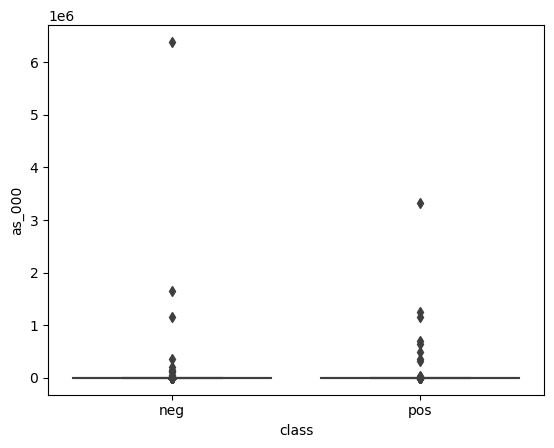

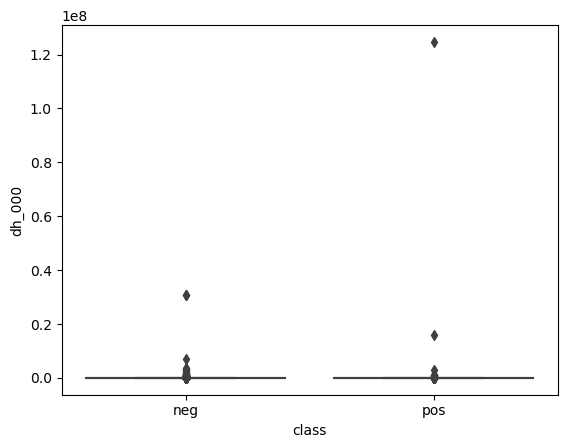

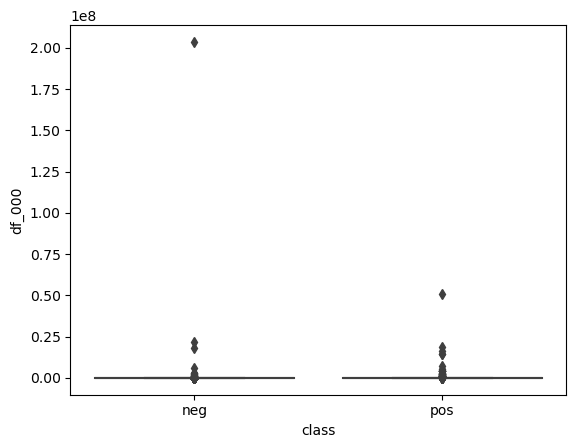

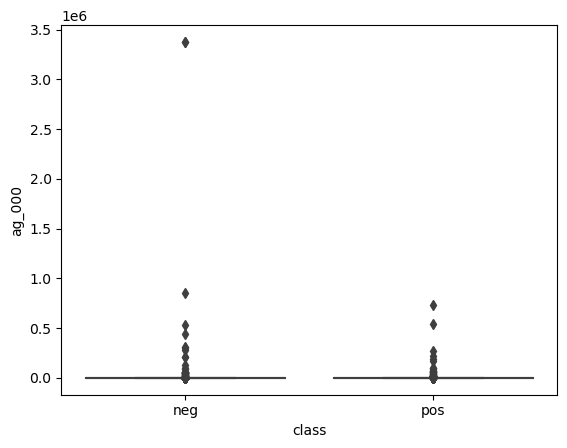

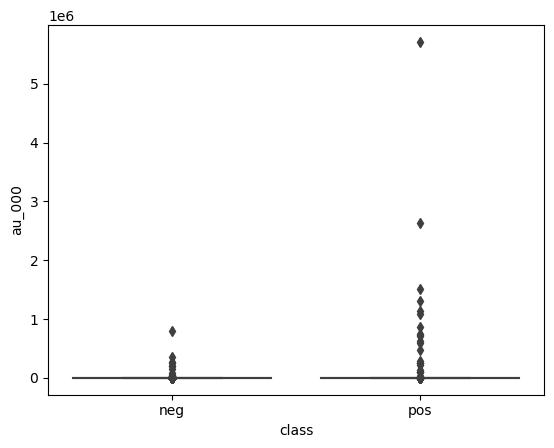

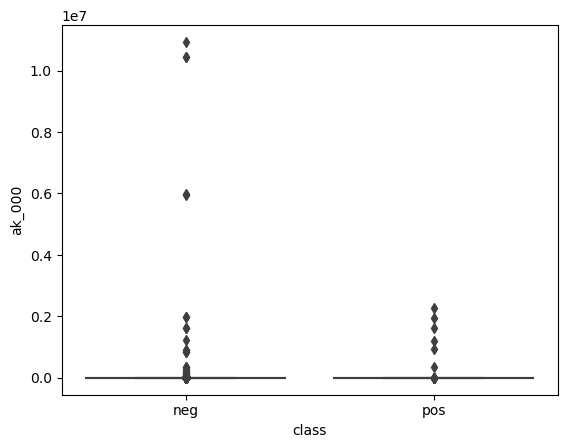

<Figure size 640x480 with 0 Axes>

In [32]:
for col in sorted_cv.index[0:top]:
    sns.boxplot(data=mean_df,y=col,x='class')
    plt.figure()

#### (v) Is this data set imbalanced?

In [33]:
mean_df['class'].value_counts()

neg    74625
pos     1375
Name: class, dtype: int64

THe data is imblanced with negative data outweighing the positive data immensely.

### (c) Train a random forest

In [34]:
data = mean_df
data['class']=data['class'].apply(lambda x: 1 if x=='pos' else 0)
train_data=data.iloc[:len(train),:]
test_data=data.iloc[len(train):,:]
X_train,y_train=train_data.iloc[:,1:],train_data['class']
X_test,y_test=test_data.iloc[:,1:],test_data['class']
test_data['class'].value_counts()

0    15625
1      375
Name: class, dtype: int64

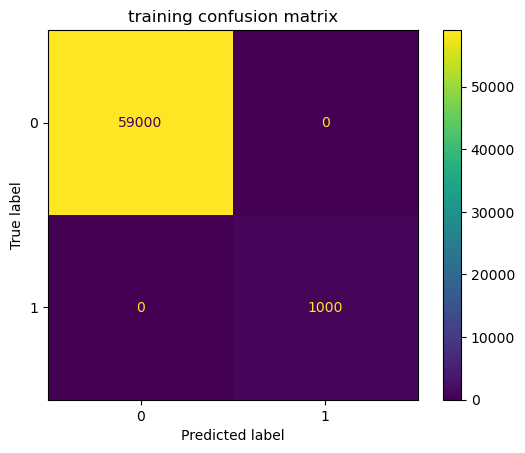

In [38]:
clf = RandomForestClassifier(oob_score=True)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_predprob_train=clf.predict_proba(X_train)[:,1]
y_pred_test=clf.predict(X_test)
y_predprob_test=clf.predict_proba(X_test)[:,1]
disp=ConfusionMatrixDisplay(confusion_matrix(y_train,y_pred_train))
disp.plot()
plt.title('training confusion matrix')
plt.show()

auc= 1.0


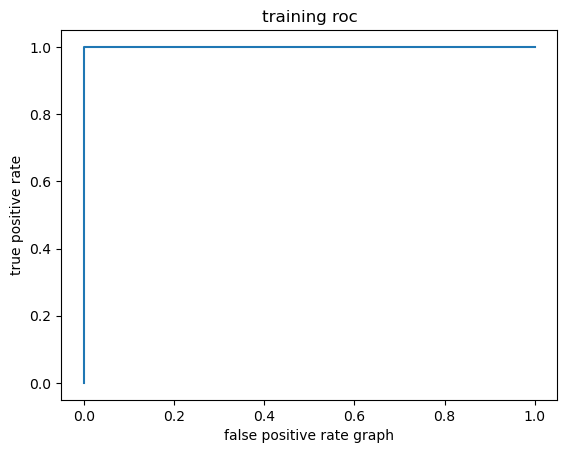

In [36]:
fpr,tpr,thresholds=roc_curve(y_train,y_predprob_train)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate graph')
plt.ylabel('true positive rate')
plt.title('training roc')
print('auc=',roc_auc_score(y_train,y_predprob_train))

having a 100% accuracy for the training set makes sense

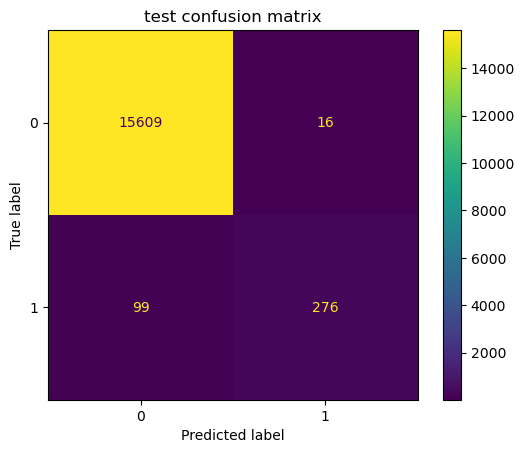

In [37]:
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test))
disp.plot()
plt.title('test confusion matrix')
plt.show()

auc= 0.9942315520000001


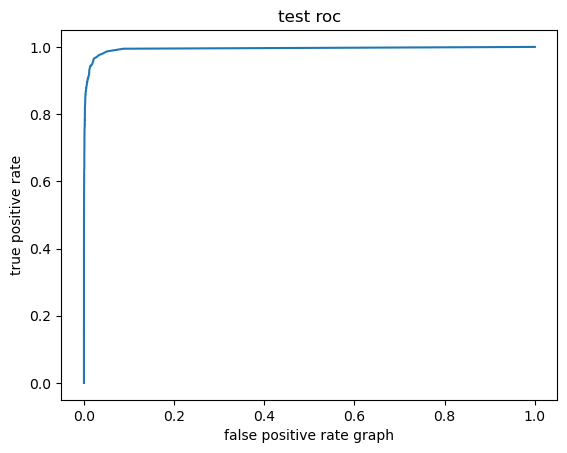

In [39]:
fpr,tpr,thresholds=roc_curve(y_test,y_predprob_test)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate graph')
plt.ylabel('true positive rate')
plt.title('test roc')
print('auc=',roc_auc_score(y_test,y_predprob_test))

In [40]:
print('misclassification error=',1-accuracy_score(y_test,y_pred_test))
print('out of bag estimate=',1-clf.oob_score_)

misclassification error= 0.008000000000000007
out of bag estimate= 0.0060833333333333295


the out of bag error is less than the test error.

### (d) Research class imbalance in random forest

Class imblanace is where the number of samples in each class of a dataset is not evenly distributed. With the random forest algorithm, it can handle some of the imbalance with its bagging properties. Random forest can address class imbalance through bootstrapping by giving more weight to minority class samples. It can also compute out of bag error for each observation which can be used to calculate the model's performance.

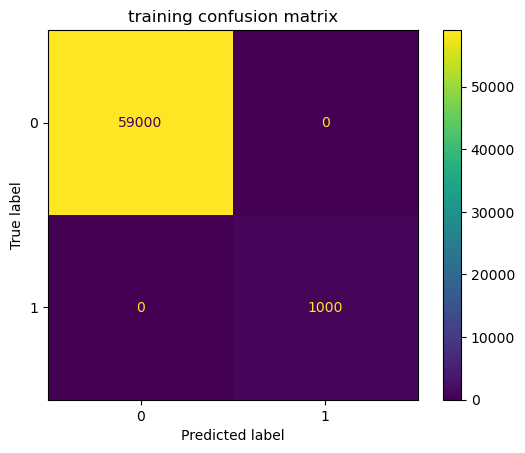

In [41]:
clf = RandomForestClassifier(oob_score=True, class_weight='balanced')
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_predprob_train=clf.predict_proba(X_train)[:,1]
y_pred_test=clf.predict(X_test)
y_predprob_test=clf.predict_proba(X_test)[:,1]
disp=ConfusionMatrixDisplay(confusion_matrix(y_train,y_pred_train))
disp.plot()
plt.title('training confusion matrix')
plt.show()

auc= 0.9999999999999999


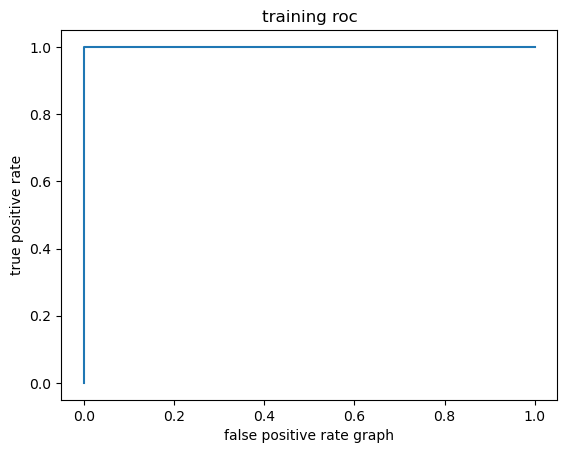

In [42]:
fpr,tpr,thresholds=roc_curve(y_train,y_predprob_train)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate graph')
plt.ylabel('true positive rate')
plt.title('training roc')
print('auc=',roc_auc_score(y_train,y_predprob_train))

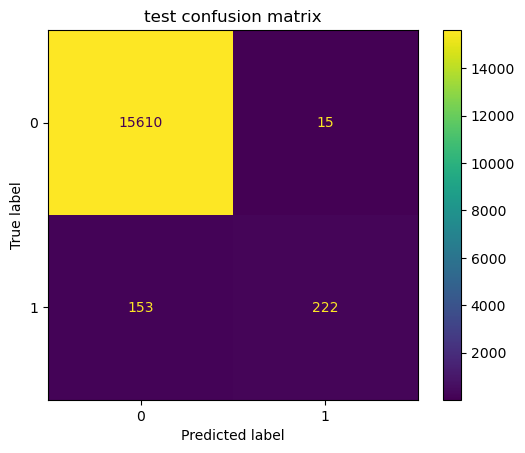

In [43]:
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test))
disp.plot()
plt.title('test confusion matrix')
plt.show()

auc= 0.9936508586666667


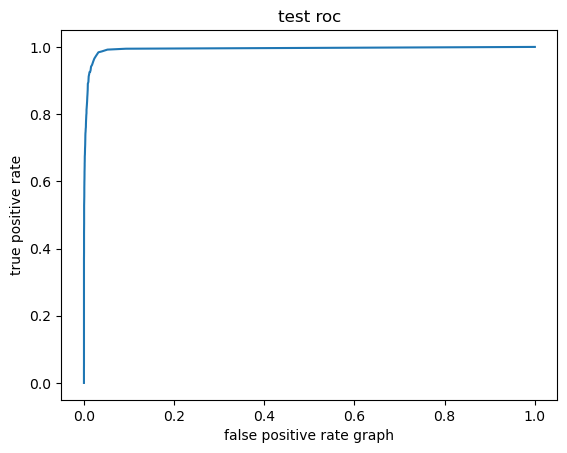

In [44]:
fpr,tpr,thresholds=roc_curve(y_test,y_predprob_test)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate graph')
plt.ylabel('true positive rate')
plt.title('test roc')
print('auc=',roc_auc_score(y_test,y_predprob_test))

In [45]:
print('misclassification error=',1-accuracy_score(y_test,y_pred_test))
print('out of bag estimate=',1-clf.oob_score_)

misclassification error= 0.010499999999999954
out of bag estimate= 0.007533333333333281


### (e) XGBoost and Model Trees

In [63]:
alphas=[10**i for i in range(-4,4)]
alphas+=[i/100 for i in range(25,1000,25)]
param_dict={'reg_alpha':alphas}
kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)
xgb=xgboost.XGBClassifier(objective='reg:logistic')
grid_cv_5_fold = GridSearchCV(xgb, param_dict, cv=kf_5)
grid_cv_5_fold.fit(X_train, y_train)

# grid_cv_10_fold = GridSearchCV(xgb, param_dict, cv=kf_10)
# grid_cv_10_fold.fit(X_train, y_train)
# grid_cv=GridSearchCV(xgb,param_dict)
# grid_cv.fit(X_train,y_train)

/Users/jacy/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:25:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "oob_score_" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jacy/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:25:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "oob_score_" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jacy/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:25:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "oob_score_" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jacy/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:25:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "oob_score_" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jacy/anaconda3/lib/python3.11/sit

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     int...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='reg:logistic', ...),
             param_grid={'reg_alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                       1000, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                       1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25,
                                       3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0,
                                       5.25, 5.5, ...]})

In [ ]:
# loo = LeaveOneOut()
# grid_cv_loo = GridSearchCV(xgb, param_dict, cv=loo)
# grid_cv_loo.fit(X_train, y_train)

In [65]:
print("best parameter (5-fold): ", grid_cv_5_fold.best_params_)
print("best cv score (5-fold): ", grid_cv_5_fold.best_score_)

best parameter (5-fold):  {'reg_alpha': 0.001}
best cv score (5-fold):  0.9946166666666667


In [66]:
best_model_5_fold = grid_cv_5_fold.best_estimator_

/Users/jacy/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "oob_score_" } are not used.

  warnings.warn(smsg, UserWarning)


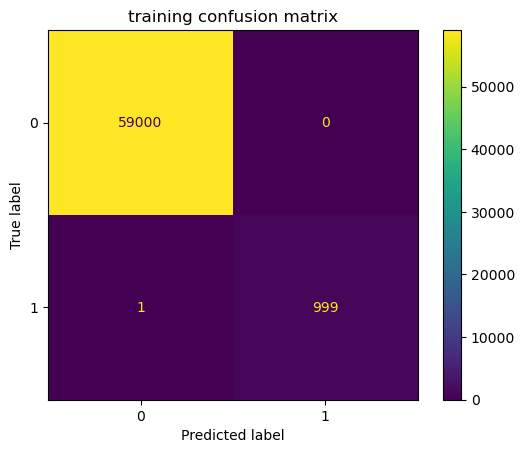

auc= 0.9999998813559322


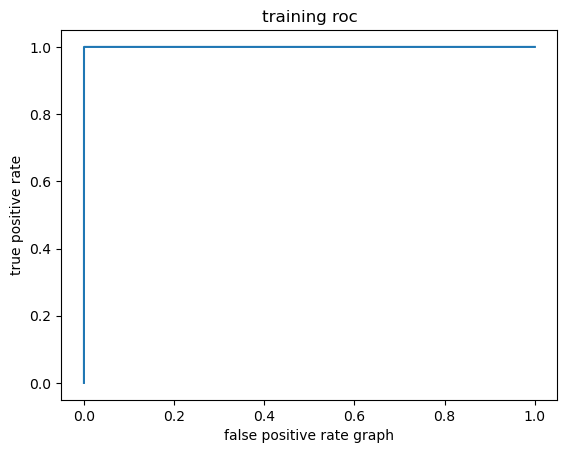

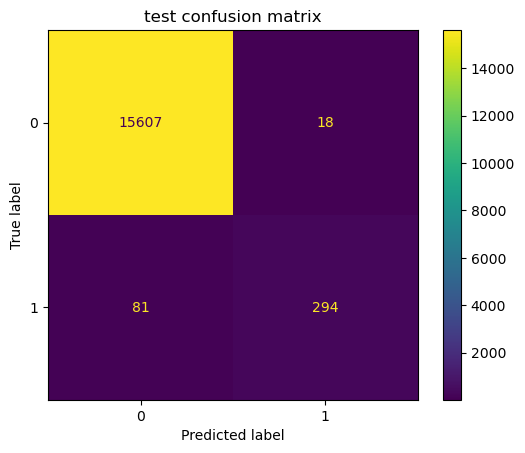

auc= 0.9946193919999999


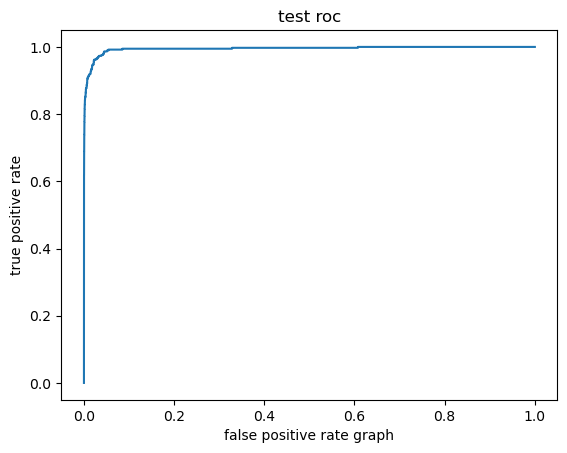

In [67]:
xgb_best=best_model_5_fold
xgb_best.fit(X_train,y_train)
y_pred_train=xgb_best.predict(X_train)
y_predprob_train=xgb_best.predict_proba(X_train)[:,1]
y_pred_test=xgb_best.predict(X_test)
y_predprob_test=xgb_best.predict_proba(X_test)[:,1]
disp=ConfusionMatrixDisplay(confusion_matrix(y_train,y_pred_train))
disp.plot()
plt.title('training confusion matrix')
plt.show()
fpr,tpr,thresholds=roc_curve(y_train,y_predprob_train)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate graph')
plt.ylabel('true positive rate')
plt.title('training roc')
print('auc=',roc_auc_score(y_train,y_predprob_train))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test))
disp.plot()
plt.title('test confusion matrix')
plt.show()
fpr,tpr,thresholds=roc_curve(y_test,y_predprob_test)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate graph')
plt.ylabel('true positive rate')
plt.title('test roc')
print('auc=',roc_auc_score(y_test,y_predprob_test))

### (f) Use SMOTE to pre-process your data

In [71]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from statistics import mean
alphas=[10**i for i in range(-4,4)]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_alpha = None
best_f1_score = 0
for alpha in alphas:
    f1_scores=[]
    cv_score=[]
    print('alpha=',alpha)
    for fold, (train_index, test_index) in enumerate(kf.split(X_train), 1):
        X_train_fold = X_train.iloc[train_index,:]
        y_train_fold = y_train.iloc[train_index]
        X_test_fold = X_train.iloc[test_index,:]
        y_test_fold = y_train.iloc[test_index]
        sm = SMOTE(random_state=42)
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train_fold, y_train_fold)
        model = xgboost.XGBClassifier(objective='reg:logistic',reg_alpha=alpha)
        model.fit(X_train_oversampled, y_train_oversampled )  
        y_pred = model.predict(X_test_fold)
        cv_score.append(accuracy_score(y_test_fold,y_pred))
        print(f'For fold {fold}:')
        print(f'Accuracy: {accuracy_score( y_test_fold,y_pred)}')
        f1_scores.append(f1_score(y_test_fold, y_pred))
        print(f'f-score: {f1_score(y_test_fold, y_pred)}')
    print('alpha=',alpha,' cv score=',mean(cv_score))
    mean_f1 = mean(f1_scores)    
    if mean_f1 > best_f1_score:
        best_f1_score = mean_f1
        best_alpha = alpha
print(f'Best alpha: {best_alpha} with Mean F1-Score: {best_f1_score}')

alpha= 0.0001
For fold 1:
Accuracy: 0.9914166666666666
f-score: 0.7643020594965675
For fold 2:
Accuracy: 0.9949166666666667
f-score: 0.8455696202531646
For fold 3:
Accuracy: 0.9933333333333333
f-score: 0.803921568627451
For fold 4:
Accuracy: 0.9940833333333333
f-score: 0.8106666666666666
For fold 5:
Accuracy: 0.9931666666666666
f-score: 0.8028846153846154
alpha= 0.0001  cv score= 0.9933833333333333
alpha= 0.001
For fold 1:
Accuracy: 0.992
f-score: 0.7767441860465115
For fold 2:
Accuracy: 0.9945
f-score: 0.8366336633663366
For fold 3:
Accuracy: 0.9936666666666667
f-score: 0.8118811881188119
For fold 4:
Accuracy: 0.9941666666666666
f-score: 0.8128342245989305
For fold 5:
Accuracy: 0.9934166666666666
f-score: 0.8096385542168674
alpha= 0.001  cv score= 0.99355
alpha= 0.01
For fold 1:
Accuracy: 0.9915833333333334
f-score: 0.7667436489607391
For fold 2:
Accuracy: 0.9950833333333333
f-score: 0.8506329113924052
For fold 3:
Accuracy: 0.9933333333333333
f-score: 0.803921568627451
For fold 4:
Acc

best alpha is 1.0

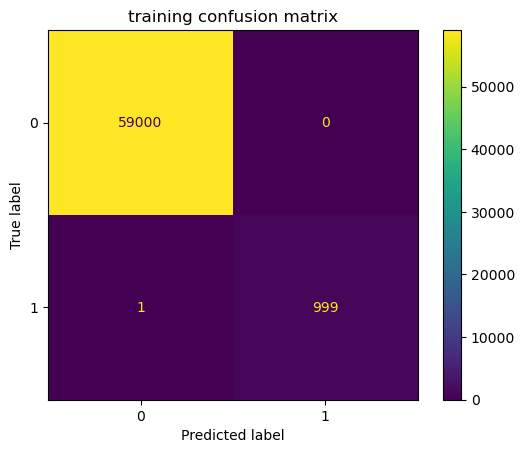

auc= 0.9999999322033898
misclassification error= 1.666666666666483e-05


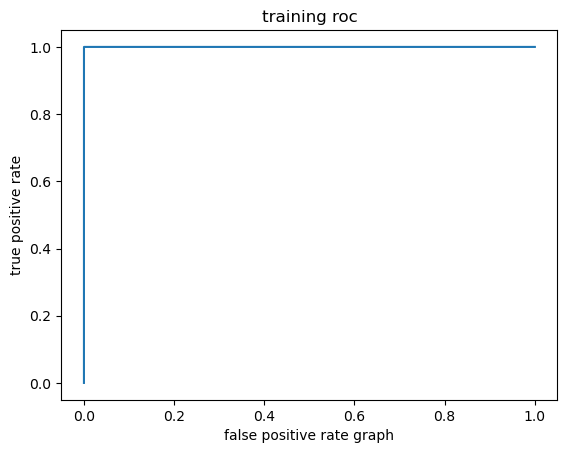

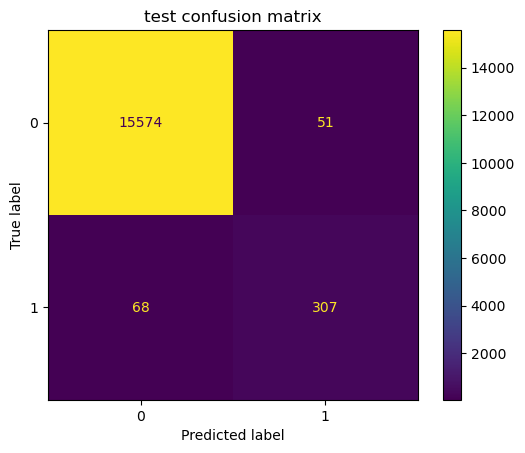

auc= 0.9938719573333332
misclassification error= 0.007437499999999986


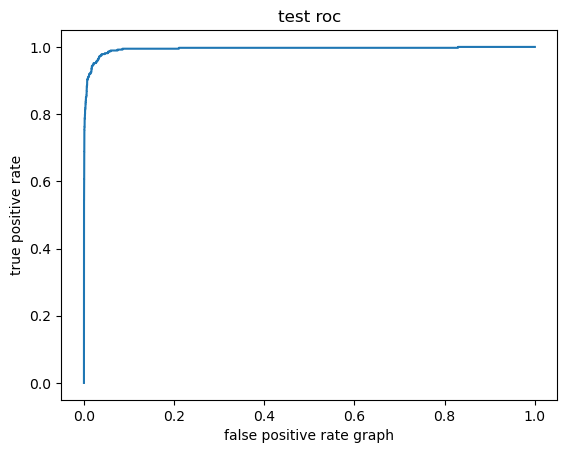

In [72]:
xgb_best_smote=xgboost.XGBClassifier(objective='reg:logistic',reg_alpha=0.001)
sm = SMOTE()
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
xgb_best_smote.fit(X_train_oversampled,y_train_oversampled)
y_pred_train=xgb_best_smote.predict(X_train)
y_predprob_train=xgb_best_smote.predict_proba(X_train)[:,1]
y_pred_test=xgb_best_smote.predict(X_test)
y_predprob_test=xgb_best_smote.predict_proba(X_test)[:,1]
disp=ConfusionMatrixDisplay(confusion_matrix(y_train,y_pred_train))
disp.plot()
plt.title('training confusion matrix')
plt.show()
fpr,tpr,thresholds=roc_curve(y_train,y_predprob_train)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate graph')
plt.ylabel('true positive rate')
plt.title('training roc')
print('auc=',roc_auc_score(y_train,y_predprob_train))
print('misclassification error=',1-accuracy_score(y_train,y_pred_train))

disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test))
disp.plot()
plt.title('test confusion matrix')
plt.show()
fpr,tpr,thresholds=roc_curve(y_test,y_predprob_test)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate graph')
plt.ylabel('true positive rate')
plt.title('test roc')
print('auc=',roc_auc_score(y_test,y_predprob_test))
print('misclassification error=',1-accuracy_score(y_test,y_pred_test))


## 2. ISLR 6.6.3

The question is about regularization in linear regression. The equation given is for Lasso where the sum of absolute values of the regression coefficients is constrained to be less than or equal to a non negative value of s.

(a) as s starts at 0, most of the coefficients will go towards zero, so the model will be underfit with a high RSS. Then, as s increases, the constraint lessen, some of the coefficients will move away from zero and the model will fit better to the training data, so the training RSS value will decrease. But, if s becomes too large the model will start overfitting and the RSS would just be insignificant.

(b) as s increases from 0, for test RSS it will decrease initially, and then eventually start increasing into a U shape because initially, the model is underfitting at a low s value with high flexibility, but then after certain point, the model will begin to overfit to the training data and then the test RSS will increase.

(c) as s increases from 0, the variance will steadily increase while the constraints are lessened. The model will become more and more sensitive to training data, increasing variance.

(d) as s increases from 0, the squared bias will have high bias at first because it is way too simple, but then decrease before increasing again because the bias will not change much further as the model is fitting closely to the training data.

(e) as increases from 0, the irreducible error will remain constant because it is not affected by the model complexity, hence the name "irreducible."

![Alt text](image-1.png)

## 3. ISLR 6.6.5

![Alt text](image-2.png)

## 4. ISLR 8.4.5

![Alt text](image-3.png)

## 5. ISLR 9.7.3

In [74]:
from sklearn.svm import SVC
import numpy as np
X = np.array([[3, 4],
              [2, 2],
              [4, 4],
              [1, 4],
              [2, 1],
              [4, 3],
              [4, 1]])
y = np.array(['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue'])

y_encoded = np.where(y == 'Red', 1, 0)

model = SVC(kernel='linear', C=1E10)
model.fit(X, y_encoded)

beta_1, beta_2 = model.coef_[0]
beta_0 = model.intercept_[0]

print(f"beta_1: {beta_1}, beta_2: {beta_2}, beta_0: {beta_0}")


beta_1: -1.9994140625000014, beta_2: 1.9994140625000014, beta_0: 0.9997070312500025


![Alt text](image-4.png)